# Search Algorithms Analysis

This notebook analyzes the performance of different search algorithms:
1. Sequential Search
2. Advanced Sequential Search
3. Binary Search

We'll analyze:
- Time complexity
- Space complexity
- Number of comparisons
- Performance across different data types (random vs sorted)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add parent directory to path for importing complexity package
sys.path.append(str(Path.cwd().parent))

from complexity.analyser import (
    ComplexityAnalyzer,
    ConstantComplexity,
    LogarithmicComplexity,
    LinearComplexity,
    LinearLogComplexity
)

from complexity.visualizer import ComplexityVisualizer

import seaborn as sns
sns.set_theme()
sns.set_palette('husl')

In [3]:
# Load the data
raw_df = pd.read_csv('../Lcs_results_raw.csv')
grouped_df = pd.read_csv('../Lcs_results_grouped.csv')

print("Raw data shape:", raw_df.shape)
print("\nGrouped data shape:", grouped_df.shape)
print("\nColumns:", grouped_df.columns.tolist())

Raw data shape: (60, 6)

Grouped data shape: (12, 6)

Columns: ['algorithm', 'data_type', 'size', 'time', 'memory', 'comparison_count']



Analyzing algorithmic complexity...


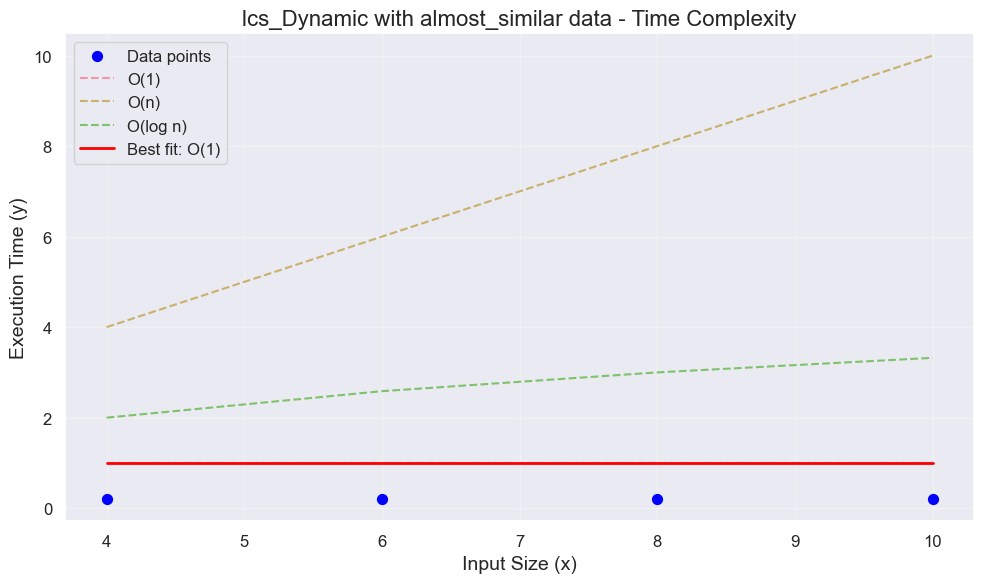

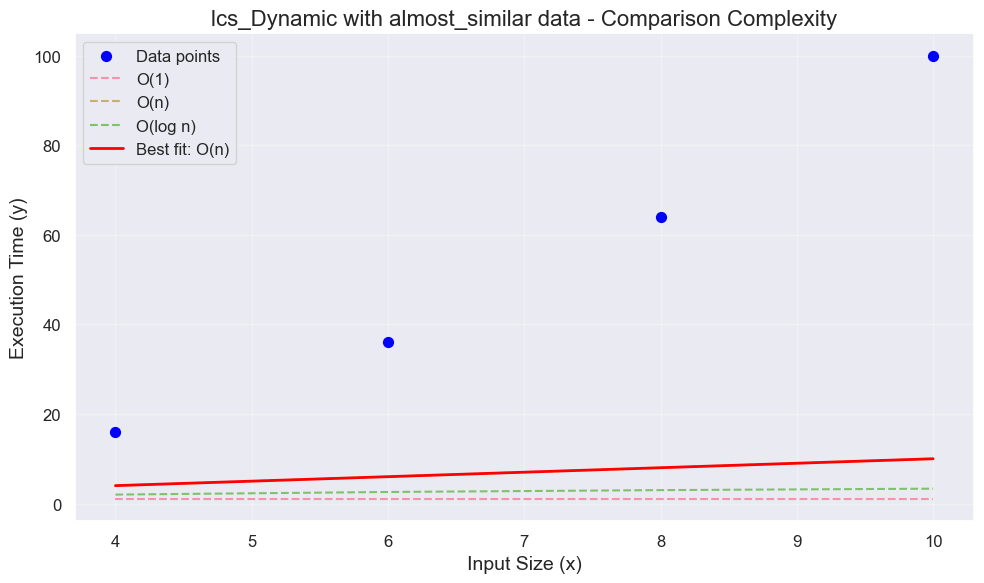


lcs_Dynamic with almost_similar data:
Time Complexity: O(1)
Comparison Complexity: O(n)


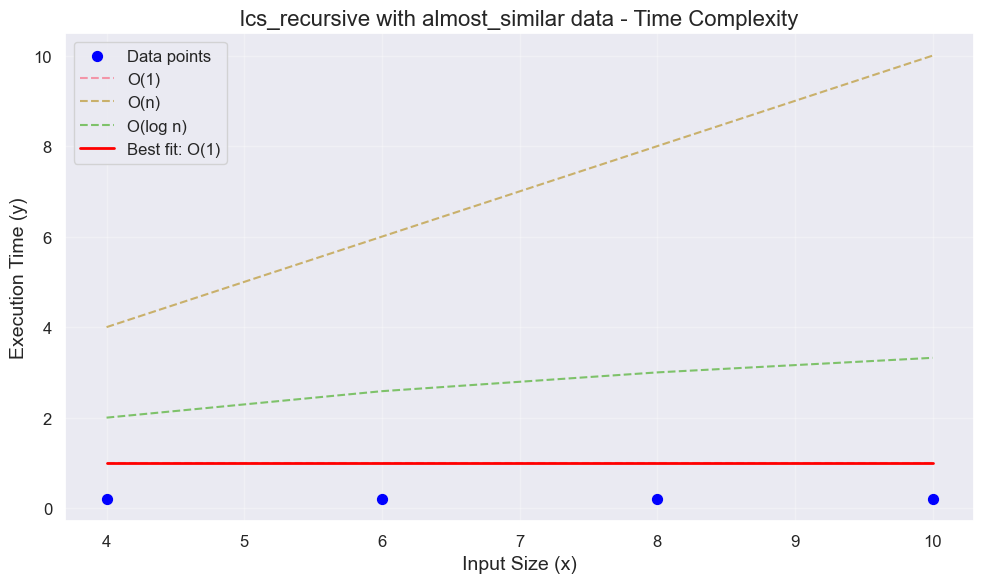

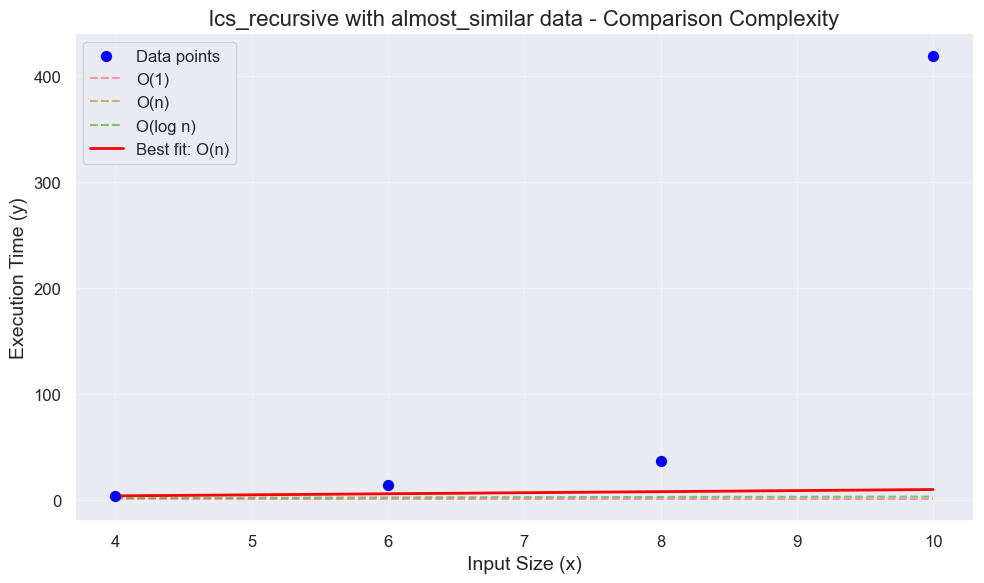


lcs_recursive with almost_similar data:
Time Complexity: O(1)
Comparison Complexity: O(n)


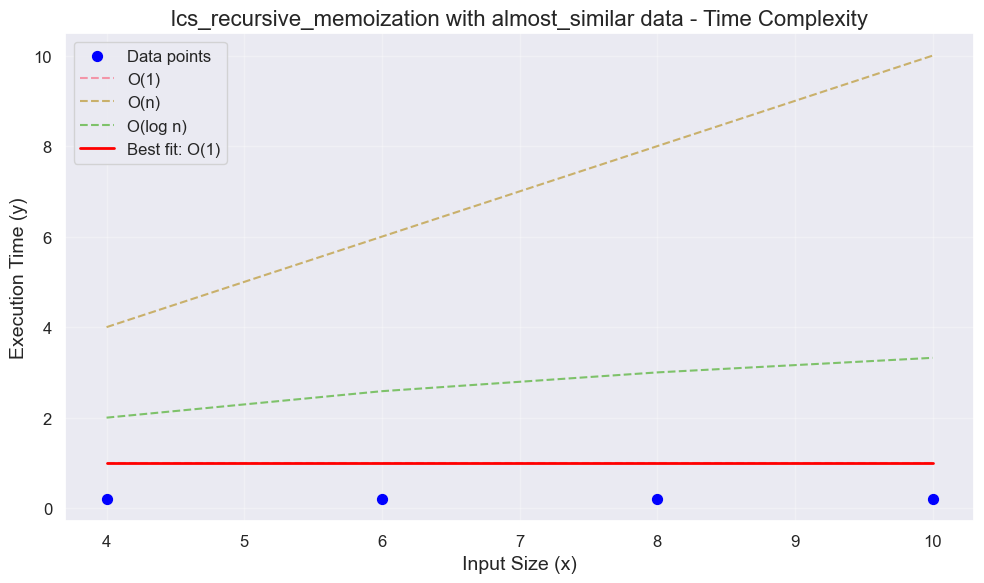

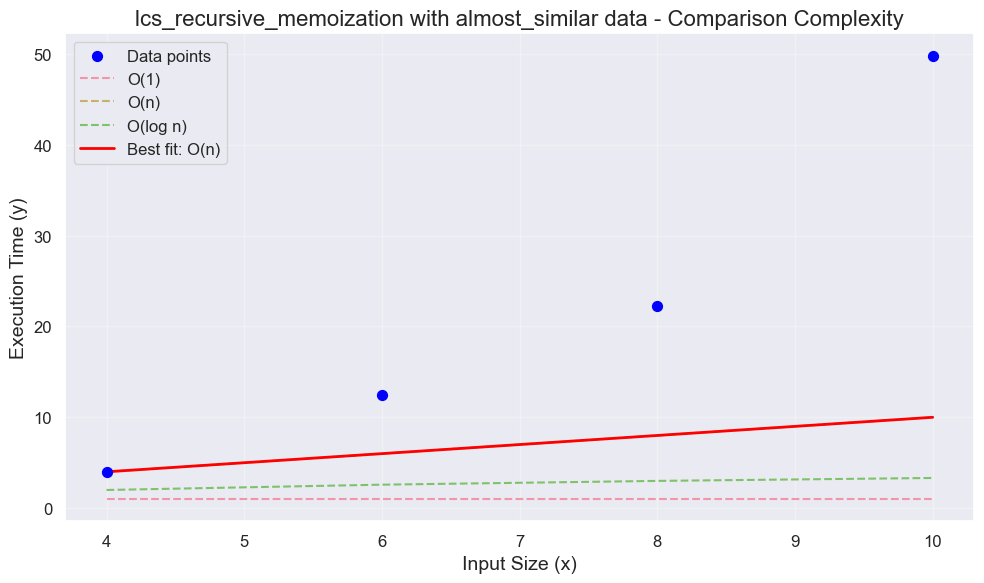


lcs_recursive_memoization with almost_similar data:
Time Complexity: O(1)
Comparison Complexity: O(n)


In [4]:
# Load the data (update the path to where your CSV files are)
raw_df = pd.read_csv('../Lcs_results_raw.csv')
grouped_df = pd.read_csv('../Lcs_results_grouped.csv')

# Create analyzer with specific complexity functions
complexity_functions = [
    ConstantComplexity(),
    LinearComplexity(),
    LogarithmicComplexity(),
    #LinearLogComplexity()
]
analyzer = ComplexityAnalyzer(complexity_functions)

# Analyze complexity for each algorithm and data type combination
print("\nAnalyzing algorithmic complexity...")

for algo_name in grouped_df['algorithm'].unique():
    for data_type in grouped_df[grouped_df['algorithm'] == algo_name]['data_type'].unique():
        # Get data for this algorithm and data type
        data = grouped_df[
            (grouped_df['algorithm'] == algo_name) & 
            (grouped_df['data_type'] == data_type)
        ]
        
        # Get sizes and measurements
        x = data['size'].values
        time_y = data['time'].values
        comp_y = data['comparison_count'].values
        
        # Create visualizers
        time_visualizer = ComplexityVisualizer(x, time_y, complexity_functions)
        comp_visualizer = ComplexityVisualizer(x, comp_y, complexity_functions)
        
        # Get complexity classes
        time_complexity, _ = analyzer.get_best_fit(x, time_y)
        comp_complexity, _ = analyzer.get_best_fit(x, comp_y)
        
        # Plot the results
        time_visualizer.plot(
            time_complexity,
            title=f"{algo_name} with {data_type} data - Time Complexity"
        )
        
        comp_visualizer.plot(
            comp_complexity,
            title=f"{algo_name} with {data_type} data - Comparison Complexity"
        )
        
        print(f"\n{algo_name} with {data_type} data:")
        print(f"Time Complexity: {time_complexity}")
        print(f"Comparison Complexity: {comp_complexity}")